# KMeans クラスタリング

KMeansアルゴリズムを利用したクラスタリングのサンプル。
教師なし学習とよばれる、教師データ(y)の答えラベルのないデータを分類する。

[参考](https://tech-clips.com/article/421516)


required sklearn, matplotlib

```
$ pip install sklearn, matplotlib
```

もしくは

```
$ pip install -r requirements.txt
```

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Wholesale customers Data Set (卸売業者の顧客データ)

In [19]:
cust_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

データセットの中身

In [20]:
print(cust_df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
7          2       3   7579   4956     9426    1669              3321   
8          1       3   5963   3648     6192     425              1716   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
11         2       3  13146   1124     4523    1420               549   
12         2       3  31714  12319    11757     287

### 必要なデータに絞る

In [21]:
del(cust_df['Channel'])
del(cust_df['Region'])
cust_array = np.array([
    cust_df['Fresh'].tolist(),
    cust_df['Milk'].tolist(),
    cust_df['Grocery'].tolist(),
    cust_df['Frozen'].tolist(),
    cust_df['Milk'].tolist(),
    cust_df['Detergents_Paper'].tolist(),
    cust_df['Delicassen'].tolist()
], np.int32)
cust_array = cust_array.T

print(cust_array)

[[12669  9656  7561 ...,  9656  2674  1338]
 [ 7057  9810  9568 ...,  9810  3293  1776]
 [ 6353  8808  7684 ...,  8808  3516  7844]
 ..., 
 [14531 15488 30243 ..., 15488 14841  1867]
 [10290  1981  2232 ...,  1981   168  2125]
 [ 2787  1698  2510 ...,  1698   477    52]]


### クラスタリング

n_clustersでいくつに分類するかを指定する。
その分類数に応じて機械学習で分類を行う。
なお、その分類されたデータの特性などは人間が調べる必要がある。

In [22]:
pred = KMeans(n_clusters=4).fit_predict(cust_array)

読み込んだcsvデータにcluster_id列を追加する

In [23]:
cust_df['cluster_id'] = pred

### 各クラスタに属するサンプル数の分布を調べる

In [24]:
value_counts = cust_df['cluster_id'].value_counts()
print(value_counts)

0    280
3     77
1     76
2      7
Name: cluster_id, dtype: int64


### cluster_id=0のクラスタに紐づく各部門商品の購買額の平均値

In [25]:
mean0 = cust_df[cust_df['cluster_id']==0].mean()
print(mean0)

Fresh               7926.889286
Milk                3202.346429
Grocery             4351.989286
Frozen              2660.746429
Detergents_Paper    1318.103571
Delicassen          1035.278571
cluster_id             0.000000
dtype: float64


### cluster_id=1のクラスタに紐づく各部門商品の購買額の平均値

In [26]:
mean1 = cust_df[cust_df['cluster_id']==1].mean()
print(mean1)

Fresh               31363.868421
Milk                 4479.921053
Grocery              5863.052632
Frozen               5329.973684
Detergents_Paper     1117.434211
Delicassen           2128.342105
cluster_id              1.000000
dtype: float64


### cluster_id=2のクラスタに紐づく各部門商品の購買額の平均値

In [27]:
mean2 = cust_df[cust_df['cluster_id']==2].mean()
print(mean2)

Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              2.000000
dtype: float64


### cluster_id=3のクラスタに紐づく各部門商品の購買額の平均値

In [28]:
mean3 = cust_df[cust_df['cluster_id']==3].mean()
print(mean3)

Fresh                4962.688312
Milk                12868.870130
Grocery             19922.246753
Frozen               1689.363636
Detergents_Paper     8994.415584
Delicassen           1739.818182
cluster_id              3.000000
dtype: float64


### 可視化

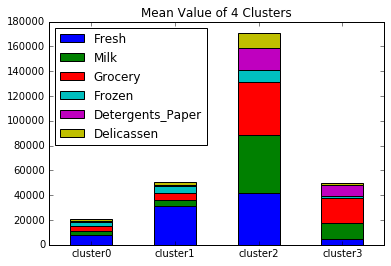

In [29]:
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

### 考察

- クラスター番号 = 0 に分類された顧客(293人)は、全体的に購買額が低い傾向にあります。
- クラスター番号 = 1 に分類された顧客(63人)は、Fresh(生鮮食品)の購買額が比較的高いことがわかります。
- クラスター番号 = 2 に分類された顧客(77人)は、Grocery(食料雑貨品)とDetergents_Paper(衛生用品と紙類)の購買額が比較的高いことがわかります。
- クラスター番号 = 3 に分類された顧客(7人)は、全てのジャンルで購買額が高いと言えます。